In [ ]:
# 3일차 수업을 위한 추가 모듈 설치
!pip install JAEN -U

INFO: pip is looking at multiple versions of langchain-openai to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.0/397.0 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 14.7 

In [ ]:
import warnings
warnings.filterwarnings("ignore") # 모든 경고 무시

## 텍스트 데이터 처리 실습 – 토큰화

In [ ]:
# transformers 라이브러리에서 AutoTokenizer 모듈을 임포트
# transformers : 다양한 사전 학습된 자연어 처리 모델을 쉽게 사용할 수 있게 해주는 라이브러리
from transformers import AutoTokenizer

# BERT 모델에 맞는 토크나이저 호출
# AutoTokenizer.from_pretrained() : 지정된 모델 이름에 맞는 토크나이저를 자동으로 다운로드
# tokenizer : 텍스트 데이터를 모델이 이해할 수 있는 숫자로 변환하는 역할
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
tokenizer("AI Essential")

# input_ids
#  • 101: 문장의 시작을 나타내는 토큰 ID
#  • 19016: ‘AI’ 단어의 토큰 ID
#	 • 26768: ‘Essential’ 단어의 토큰 ID
#	 • 102: 문장의 끝을 나타내는 토큰 ID

# token_type_ids
#  • BERT 모델은 두 개의 문장을 비교할 때 사용되도록 설계되어 있어서, 문장1과 문장2를 구분
#  • 모든 값이 0이므로, 하나의 문장만 처리하는 것을 의미

# attention_mask
#  • 각 토큰이 실제로 유효한지(1) 또는 패딩인지(0)를 의미
#  • 패딩은 다른 문장들과 같은 길이를 맞추기 위해 추가하는 더미 값

{'input_ids': [101, 19016, 26768, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [ ]:
# vocab_size: Bert 어휘 사전의 크기
tokenizer.vocab_size

28996

In [ ]:
# tokenize: 입력된 텍스트를 토큰 단위로 분리
tokens = tokenizer.tokenize("AI Essential")
tokens

['AI', 'Essential']

In [ ]:
# convert_tokens_to_ids(): 각 토큰을 BERT 모델의 사전에서 해당하는 고유한 ID로 변환
ids = tokenizer.convert_tokens_to_ids(tokens)
ids

[19016, 26768]

In [ ]:
# decode(): 해당 숫자 ID를 다시 사람이 읽을 수 있는 텍스트로 변환
tokenizer.decode(ids)

'AI Essential'

# 텍스트 데이터 처리 실습 - 임베딩

In [ ]:
import torch
import torch.nn as nn

# 어휘 사전(vocabulary) 생성 및 단어를 정수 인덱스로 매핑
word_to_index = {
    "hello": 0,
    "world": 1,
    "AI": 2,
    "is": 3,
    "essential": 4,
    "learning": 5,
    "deep": 6,
    "neural": 7,
    "networks": 8,
    "model": 9
}

# 임베딩 레이어 생성 (사전 내 단어 수만큼 num_embeddings 설정)
embedding_layer = nn.Embedding(num_embeddings=len(word_to_index), embedding_dim=5)

# 임베딩에 사용할 예시 입력 데이터 (단어를 정수 인덱스로 변환)
# 예: "AI is essential"을 임베딩에 넣기 위해 정수 인덱스로 변환
input_words = ["AI", "is", "essential"]
input_indices = [word_to_index[word] for word in input_words]  # ["AI", "is", "essential"] -> [2, 3, 4]

# 입력 데이터를 텐서로 변환
input_data = torch.tensor(input_indices)

# 임베딩 레이어에 입력 데이터를 전달하여 벡터로 변환
embedded_output = embedding_layer(input_data)

# 결과 출력
print("입력 데이터 (단어):", input_words)
print("입력 데이터 (정수 인덱스):", input_data)
print("임베딩 결과 (벡터):\n", embedded_output)

입력 데이터 (단어): ['AI', 'is', 'essential']
입력 데이터 (정수 인덱스): tensor([2, 3, 4])
임베딩 결과 (벡터):
 tensor([[ 0.2348,  0.3708,  0.5548,  1.4795, -1.6389],
        [-0.0189,  1.8153, -0.4349, -1.2843,  0.1390],
        [ 0.5693,  0.5063,  0.4424,  0.2958, -0.8612]],
       grad_fn=<EmbeddingBackward0>)


# RNN Text Lab

# 기본 모듈 import

In [ ]:
!pip install torchinfo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary

# 연산 장치 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 글자 예측 (단어 완성, Character Level)
 - 단어의 마지막 글자 예측

## 글자 사전 생성

In [ ]:
word_ = 'actor'
list(word_)

['a', 'c', 't', 'o', 'r']

In [ ]:
# 학습할 단어 목록 (character-level 임베딩을 만들기 위한 단어 리스트)
words = ['actor', 'angel', 'april', 'bacon', 'birth', 'black', 'cacao', 'child', 'count', 'drink']

# 글자 사전 생성 함수 정의
def build_vocab(data):
    tokens = []  # 모든 단어의 글자를 저장할 리스트 생성

    # 각 단어를 글자(character) 단위로 분리하여 tokens 리스트에 추가
    # 글자 단위로 분리하는 이유 : 단어의 마지막 글자를 예측할거니까
    for word in data:
        # list(word)는 단어를 개별 글자(character) 리스트로 변환
        # 예: 'actor' -> ['a', 'c', 't', 'o', 'r']
        tokens.extend(list(word))  # extend는 리스트에 각 글자를 하나씩 추가해줌

    # 중복 제거 후 글자 사전 생성
    # set(tokens): 중복된 글자를 제거하여 유일한 글자 집합을 만듦
    # enumerate(set(tokens)): 각 유일한 글자에 인덱스를 부여 (0부터 시작)
    # {k: v for v, k in ...}: 글자와 인덱스를 매핑하여 딕셔너리 형태로 반환
    return {k: v for v, k in enumerate(set(tokens))}

# 위에서 정의한 함수로 글자 사전 생성
vocab = build_vocab(words)

# 생성된 글자 사전 출력
vocab

{'k': 0,
 'a': 1,
 'n': 2,
 'h': 3,
 'g': 4,
 'e': 5,
 't': 6,
 'i': 7,
 'b': 8,
 'r': 9,
 'l': 10,
 'p': 11,
 'o': 12,
 'd': 13,
 'u': 14,
 'c': 15}

In [ ]:
# 글자 목록 확인
vocab.keys()

dict_keys(['k', 'a', 'n', 'h', 'g', 'e', 't', 'i', 'b', 'r', 'l', 'p', 'o', 'd', 'u', 'c'])

In [ ]:
# 정수 -> 글자 사전 생성
i2c = {i:c for c, i in vocab.items()}
i2c

{0: 'k',
 1: 'a',
 2: 'n',
 3: 'h',
 4: 'g',
 5: 'e',
 6: 't',
 7: 'i',
 8: 'b',
 9: 'r',
 10: 'l',
 11: 'p',
 12: 'o',
 13: 'd',
 14: 'u',
 15: 'c'}

## 글자 Tokenize(Sequence 변환)

In [ ]:
# 단어를 글자로 토큰화
seqs = [[vocab[c] for c in word] for word in words]
seqs

[[1, 15, 6, 12, 9],
 [1, 2, 4, 5, 10],
 [1, 11, 9, 7, 10],
 [8, 1, 15, 12, 2],
 [8, 7, 9, 6, 3],
 [8, 10, 1, 15, 0],
 [15, 1, 15, 1, 12],
 [15, 3, 7, 10, 13],
 [15, 12, 14, 2, 6],
 [13, 9, 7, 2, 0]]

In [ ]:
# 단어를 글자(character) 단위로 토큰화하여 정수 인덱스의 시퀀스로 변환
seqs = []  # 각 단어의 글자 인덱스 리스트를 저장할 리스트

# 각 단어를 반복하여 처리
for word in words:
    char_indices = []  # 현재 단어의 글자 인덱스를 저장할 리스트
    for c in word:
        # 글자를 사전에 매핑된 정수 인덱스로 변환하여 리스트에 추가
        char_indices.append(vocab[c])
    # 한 단어의 글자 인덱스 리스트를 전체 리스트에 추가(2차원으로 만들어줌)
    seqs.append(char_indices)
# 변환된 결과 출력
seqs

[[1, 15, 6, 12, 9],
 [1, 2, 4, 5, 10],
 [1, 11, 9, 7, 10],
 [8, 1, 15, 12, 2],
 [8, 7, 9, 6, 3],
 [8, 10, 1, 15, 0],
 [15, 1, 15, 1, 12],
 [15, 3, 7, 10, 13],
 [15, 12, 14, 2, 6],
 [13, 9, 7, 2, 0]]

## 벡터화 (Vectorize)

In [ ]:
# 텐서로 변환
x = torch.tensor(seqs)[:, :-1].to(device)
y = torch.tensor(seqs)[:, -1].to(device)

# x(토큰화된 단어 데이터)를 원핫 벡터화
# 보통은 nn.Embedding을 사용하여 임베딩 레이어로 각 단어 또는 토큰을 고차원 밀집 벡터(Dense Vector)로 변환
x_vec = F.one_hot(x, num_classes=16).to(torch.float32)
x_vec[:1], x_vec.shape, y.shape

NameError: name 'torch' is not defined

## 모델 구성 및 생성

In [ ]:
# 다음 글자(Next Character) 예측 모델 구성
class NextChar(nn.Module):
    def __init__(self, vocab_size, hidden_size, output_size):
        super().__init__()

        # LSTM 레이어 정의
        # • vocab_size: 입력 데이터의 크기(보통은 어휘사전의 크기)
        # • hidden_size: LSTM 레이어의 은닉 상태의 크기
        # • batch_first=True:
        #    기본적으로 PyTorch의 순환 레이어(RNN, LSTM, GRU)는 입력 텐서의 차원을 (hidden_size, batch_size, vocab_size)로 가정
        #    batch_first=True로 설정하면 입력 텐서의 차원 순서를 (batch_size, hidden_size, vocab_size)로 변경할 수 있음
        #    대부분의 딥러닝 프레임워크에서는 배치 크기를 첫 번째 차원으로 다루는 것이 일반적이기 때문
        self.rnn = nn.LSTM(vocab_size, hidden_size, batch_first=True)

        # 출력 레이어 정의
        # • hidden_size: LSTM의 마지막 은닉 상태의 크기
        # • output_size: 최종 출력 차원 (보통은 어휘 사전의 크기)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM 레이어를 통과시켜 순전파 수행
        # • x: 입력 텐서 (배치 크기, 시퀀스 길이, 입력 크기)
        # • _: state, LSTM의 마지막 은닉 상태와 셀 상태는 현재 필요 없으므로 _로 처리
        #   out, (hidden_state, cell_state) = self.rnn(x)로 처리
        #   이 문제에서는 acto 뒤의 단어인 r을 예측하는 단일 예측 작업만 수행하기 때문에 (hidden_state, cell_state)가 필요없음
        out, _ = self.rnn(x)

        # 마지막 타임스텝의 출력을 사용하여 최종 예측 수행
        # • out[:, -1, :]: 시퀀스의 마지막 타임스텝의 출력 선택 (배치 크기, 시퀀스의 마지막 타임스텝, hidden_size)
        # 여기서 마지막 타임스텝의 출력은 "acto"의 "o"를 처리한 결과를 의미
        # 이 출력에는 LSTM이 입력 시퀀스 전체("acto")를 처리하면서 학습한 정보를 담고 있음.
        out = self.fc(out[:, -1, :])

        # 최종 출력 반환 (배치 크기, output_size)
        return out

In [ ]:
# torch.manual_seed : 랜덤 시드 고정
torch.manual_seed(0)
# 모델 인스턴스 생성
# • vocab_size: 입력 데이터의 크기(보통은 어휘사전의 크기)
# • hidden_size: LSTM 레이어의 은닉 상태의 크기
# • output_size: 최종 출력 차원 (보통은 어휘 사전의 크기, 다중분류니까)
model = NextChar(len(vocab), 128, len(vocab)).to(device)

# 출력 테스트
output = model(x_vec)
output.shape

# torch.Size
# 10 : 시퀀스의 개수
# 16 : 어휘사전의 크기

## 모델 학습

In [ ]:
loss_fn = nn.CrossEntropyLoss() # 손실 함수
optimizer = optim.Adam(model.parameters()) # 최적화 도구(optimizer)

epochs = 1000 # 최대 에폭 지정
results = {'cost':[]}

model.train() # 학습 모드 설정

for epoch in range(epochs):
    h = model(x_vec) # 예측 값 생성(추론)
    loss = loss_fn(h, y) # 손실 계산

    optimizer.zero_grad() # 미분 값 초기화
    loss.backward() # 역전파(미분 계산)
    optimizer.step() # 업데이트 진행

    results['cost'].append(loss.item())

    if epoch%100 == 0:
        print(f'epoch: {epoch:3d}, cost: {results["cost"][-1]:.10f}')

## 예측 값 생성(추론)

In [ ]:
pred = model(x_vec) # 예측 값 생성 (벡터 값)
# 벡터 값을 정수로 변환
# torch.argmax(pred, dim=1) : 행을 기준으로 텐서에서 가장 큰 값을 가지는 열의 인덱스를 반환
# detach(): 값만 구할거니까 해당 텐서를 계산 그래프에서 분리하여 기울기 계산을 하지 않음
# cpu().numpy() : numpy배열로 변환하려면 cpu여야 함
pred = torch.argmax(pred, dim=1).detach().cpu().numpy()

print(f'원본 데이터: {words}')
print(f'입력 데이터: {["".join([i2c[int(i)] for i in x_seq]) for x_seq in x]}')
print(f'예측한 글자: {[i2c[i] for i in pred]}')

---

# 긍정/부정 분류(Many to One)

## 학습용 데이터 구성

In [ ]:
# 특성(feature) 데이터
corpus = [
    'very good nice quality',
    'stop lying',
    'ugly terrible',
    'excellent work',
    'adorable lovely',
    'bad',
    'great nice'
]

# 레이블(label) 데이터
y = torch.tensor([1, 0, 0, 1, 1, 0, 1], dtype=torch.float32).reshape(-1, 1) # 0: 부정, 1: 긍정

## 토크나이저 생성 및 토큰화

In [ ]:
from transformers import AutoTokenizer

# GPT2 기반의 'simple-word-tokenizer' 토크나이저를 불러오기
# clean_up_tokenization_spaces=True : 토큰화 과정에서 불필요한 공백을 자동 정리
tokenizer = AutoTokenizer.from_pretrained(
    'gmteacher/simple-word-tokenizer',
    clean_up_tokenization_spaces=True)
# corpus에 있는 문장들을 토큰화하고, 각 단어를 고유한 정수 ID로 변환
seqs = tokenizer(corpus)['input_ids']
seqs # 변환된 시퀀스

[[12, 4, 0, 8], [9, 7], [11, 10], [3, 13], [1, 6], [2], [5, 0]]

In [ ]:
# 시퀀스를 단어로 복원
[tokenizer.decode(seq) for seq in seqs]

['very good nice quality',
 'stop lying',
 'ugly terrible',
 'excellent work',
 'adorable lovely',
 'bad',
 'great nice']

In [ ]:
tokenizer.get_vocab()

{'quality': 8,
 'good': 4,
 'lovely': 6,
 'ugly': 11,
 '<unk>': 14,
 'lying': 7,
 'adorable': 1,
 'nice': 0,
 'great': 5,
 'stop': 9,
 'terrible': 10,
 'bad': 2,
 'work': 13,
 'very': 12,
 'excellent': 3}

## 패딩(Padding)

In [ ]:
from torch.nn.utils.rnn import pad_sequence

# 각 시퀀스를 텐서로 변환
seqs = [torch.tensor(seq) for seq in seqs]

# pad_sequence : 각 시퀀스를 동일한 길이로 패딩 (짧은 시퀀스에 0을 추가)
x = pad_sequence(seqs, batch_first=True)
x

tensor([[12,  4,  0,  8],
        [ 9,  7,  0,  0],
        [11, 10,  0,  0],
        [ 3, 13,  0,  0],
        [ 1,  6,  0,  0],
        [ 2,  0,  0,  0],
        [ 5,  0,  0,  0]])

In [ ]:
x.shape[1]

4

## 모델 구성 및 생성

In [ ]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, seq_len, num_class):
        super().__init__()
        # 임베딩 계층
        # • vocab_size: 전체 단어 사전의 크기, 각 단어를 고유한 정수로 매핑
        # • embed_dim: 각 단어를 고정된 크기의 벡터로 변환할 임베딩 벡터의 차원
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        # Flatten 계층: 다차원 텐서를 1차원으로 펼쳐서 완전 연결 계층에 전달
        # 임베딩의 출력 shape (배치 크기, 시퀀스 길이, 임베딩 차원) -> (배치 크기, 입력 크기(시퀀스 길이 * 임베딩 차원))
        self.flat = nn.Flatten()
        # 완전 연결 계층
        # • embed_dim*seq_len : 입력 크기(임베딩차원*입력시퀀스의 길이)
        # • num_class : 출력 크기 (클래스의 수)
        self.fc = nn.Linear(embed_dim*seq_len, num_class)
        # Sigmoid 계층
        #   이진 분류
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.embedding(x)
        out = self.flat(out)
        out = self.fc(out)
        out = self.sigmoid(out)
        return out

In [ ]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, seq_len, num_class):
        super().__init__()
        # 임베딩 계층
        # • vocab_size: 전체 단어 사전의 크기, 각 단어를 고유한 정수로 매핑
        # • embed_dim: 각 단어를 고정된 크기의 벡터로 변환할 임베딩 벡터의 차원
        # • batch_first=True : RNN계열은 입력 텐서의 차원 순서가 (시퀀스 길이, 배치 크기, 입력 차원)->(배치 크기, 시퀀스 길이, 입력 차원)로 변경
        #    그러나 대부분의 레이어는 배치크기가 첫번째 차원으로 오기 때문에 사용
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm=nn.LSTM(embed_dim, 128, batch_first=True)

        # 완전 연결 계층
        # • embed_dim*seq_len : 입력 크기(임베딩차원*입력시퀀스의 길이)
        # • num_class : 출력 크기 (클래스의 수) 여기선 이진분류
        self.fc = nn.Linear(128, num_class)
        # Sigmoid 계층
        #   이진 분류
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.embedding(x)
        out, _ = self.lstm(out)
        out = self.fc(out[:, -1, :])
        out = self.sigmoid(out)
        return out

In [ ]:
torch.manual_seed(0)
# 모델 인스턴스
# • tokenizer.vocab_size: 어휘 사전의 크기
# • 2: 임베딩 차원 (각 단어를 2차원 벡터로 표현)
# • x.shape[1]: 입력 시퀀스의 길이 (패딩된 시퀀스의 길이)
# • 1: 분류할 클래스 수 (이진 분류이므로 1)
model = TextClassifier(tokenizer.vocab_size, 2, x.shape[1], 1).to(device)

# 출력 테스트
output = model(x.to(device))
output.shape

torch.Size([7, 1])

In [ ]:

# 장치 적용
x = x.to(device)
y = y.to(device)

In [ ]:
loss_fn = nn.BCELoss() # 손실 함수
optimizer = optim.Adam(model.parameters()) # 최적화 도구(optimizer)

epochs = 5000 # 최대 에폭 지정
results = {'cost':[]}

model.train() # 학습 모드 설정

for epoch in range(epochs):
    h = model(x) # 예측 값 생성(추론)
    loss = loss_fn(h, y) # 손실 계산

    optimizer.zero_grad() # 미분 값 초기화
    loss.backward() # 역전파(미분 계산)
    optimizer.step() # 업데이트 진행

    results['cost'].append(loss.item()) # 현재 에포크의 손실 값을 저장, loss.item()은 PyTorch에서 손실 텐서(loss)의 값을 파이썬의 숫자 자료형으로 변환

    if epoch%1000 == 0:
        print(f'epoch: {epoch:4d}, cost: {results["cost"][-1]:.10f}')

epoch:    0, cost: 0.6930196881
epoch: 1000, cost: 0.0000290954
epoch: 2000, cost: 0.0000086993
epoch: 3000, cost: 0.0000039269
epoch: 4000, cost: 0.0000020518


In [ ]:
h

tensor([[1.0000e+00],
        [4.8208e-06],
        [2.4906e-07],
        [1.0000e+00],
        [1.0000e+00],
        [2.3265e-07],
        [1.0000e+00]], grad_fn=<SigmoidBackward0>)

In [ ]:
y

tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])

In [ ]:
# 예측 값(시그모이드 값)을 클래스로 변환
# • h.view(-1): 시그모이드 값을 쉽게 구하기 위해 모델의 출력 텐서를 1차원 텐서로 변환
# • .detach(): 메모리 효율을 위해 이 텐서가 업데이트되지 않도록 함
# • .cpu(): CPU로 이동 (numpy나 파이썬 연산을 위해)
# • > 0.5: 시그모이드 값이 0.5보다 크면 클래스 1(긍정), 작으면 클래스 0(부정)으로 분류
# • .to(torch.float32): Boolean 결과를 float32 자료형으로 변환
pred = (h.view(-1).detach().cpu() > 0.5).to(torch.float32)

print(f'실제 값: {y.view(-1)}')
print(f'예측 값: {pred}')

실제 값: tensor([1., 0., 0., 1., 1., 0., 1.])
예측 값: tensor([1., 0., 0., 1., 1., 0., 1.])


## 임베딩 계층 시각화

In [ ]:
# 학습에 사용된 단어의 id 목록화
# unique() : 중복을 제거하고, 각 단어를 나타내는 고유한 정수 ID 목록을 반환
x.unique()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

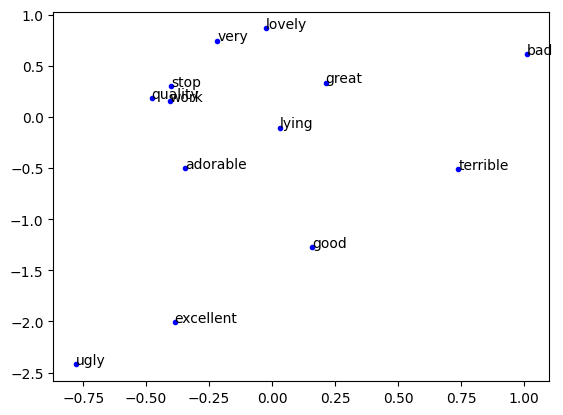

In [ ]:
# 임베딩 가중치를 가져와서 Numpy 배열로 변환
weights = model.embedding.weight.detach().cpu().numpy()
unique_ids = x.unique().cpu().numpy()
# 임베딩 벡터의 첫 두 차원을 d1, d2에 저장
for idx, (d1, d2) in enumerate(weights[unique_ids]):
    if idx == 0:
        continue
    plt.plot(d1, d2, 'b.')
    plt.annotate(tokenizer.decode(unique_ids[idx]), (d1, d2))

#	•	단어 벡터 사이의 거리와 위치는 단어 간의 의미적 유사성이나 차이를 나타냄
#	•	great, adorable, excellent 등이 서로 가깝게 위치해 있어, 모델이 이 단어들을 유사한 의미로 인식하고 있음을 보여줌
#	•	lying, ugly, terrible 등은 다른 위치에 분포해 있으며, 서로 비슷한 의미로 인식하고 있음을 보여줌
#	•	긍정적인 단어(excellent, adorable, great 등)와 부정적인 단어(lying, ugly, terrible 등)가 서로 구분된 위치에 군집을 형성하는 것을 볼 수 있음

---

# 한국어-영어 번역기

## 한-영 말뭉치 준비

In [ ]:
import os
import zipfile
from urllib import request  # 인터넷에서 파일 다운로드 위한 모듈

# 'data' 폴더 생성 (이미 존재하면 그대로 둠)
os.makedirs('data', exist_ok=True)

# 파일 저장 경로
file_path = 'data/kor_eng.zip'
# 다운로드할 파일 URL (http://www.manythings.org/anki/)
url = 'http://www.manythings.org/anki/kor-eng.zip'
# 웹 요청에 사용할 사용자 에이전트 설정
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}

# 요청 준비 (헤더 포함)
req = request.Request(url, headers=headers)

# URL에 요청 보내고 파일로 저장
with request.urlopen(req) as r:  # 요청 보내고 응답 받음
    with open(file_path, 'wb') as f:  # 파일 바이너리 쓰기 모드로 열기
        f.write(r.read())  # 응답 내용 파일에 씀

# ZIP 파일 열어서 'data' 폴더에 압축 풀기
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('data')  # 'data' 폴더에 ZIP 파일 내용 추출

In [ ]:
# 한-영 말뭉치 읽기
import csv

# 'data/kor.txt' 파일을 읽기 모드로 열기 (UTF-8 인코딩 사용)
with open('data/kor.txt', encoding='utf-8') as file:
    rdr = csv.reader(file, delimiter='\t')  # 탭을 구분자로 사용해 읽기
    data = [line[:-1] for line in rdr]  # 각 줄의 마지막 요소 제외하고 저장

In [ ]:
# 말뭉치 출력
print(data[:5])
print(len(data))

[['Go.', '가.'], ['Hi.', '안녕.'], ['Run!', '뛰어!'], ['Run.', '뛰어.'], ['Who?', '누구?']]
5890


In [ ]:
# 데이터 샘플링
# 전체 데이터 중에 3000개만 사용
data = data[:3000]

In [ ]:
# 한-영 데이터 분리
english = [line[0] for line in data]
korean = [line[1] for line in data]
english[:5], korean[:5]

(['Go.', 'Hi.', 'Run!', 'Run.', 'Who?'], ['가.', '안녕.', '뛰어!', '뛰어.', '누구?'])

In [ ]:
# 텍스트 클리닝: 문자, 숫자, 일부 기호만 남기고 제거
import re

# 정규 표현식 [^A-Za-z0-9!? ], [^ㄱ-ㅎㅏ-ㅣ가-힣!? ]

print('제거 전:', korean[1999], english[1999])
# 영어: 알파벳, 숫자, !, ?, 공백만 남기고 제거
english = [re.sub("[^A-Za-z0-9!? ]", " ", line) for line in english]
# 한글: 한글 자모, 완성형 한글, !, ?, 공백만 남기고 제거
korean = [re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣!? ]", " ", line) for line in korean]
print('제거 후:', korean[1999], english[1999])

제거 전: 그들은 당신을 지켜보고 있다. They're watching you.
제거 후: 그들은 당신을 지켜보고 있다  They re watching you 


In [ ]:
# 영어 토크나이저 생성
from transformers import AutoTokenizer

eng_tokenizer = AutoTokenizer.from_pretrained(
    'gmteacher/simple-word-tokenizer-english',
    clean_up_tokenization_spaces=True
)

In [ ]:
# 한국어 토크나이저 생성
from transformers import AutoTokenizer

kor_tokenizer = AutoTokenizer.from_pretrained(
    'gmteacher/simple-word-tokenizer-korean',
    clean_up_tokenization_spaces=True
)

In [ ]:
# 데이터 토큰화
import torch

# 한국어 문장을 토큰화하고 토큰 ID 텐서 생성
kor_tokens = [torch.tensor(kor_tokenizer(line)['input_ids']) for line in korean]

# 영어 문장에 시작 토큰 <bos> 추가 후 토큰화하고 토큰 ID 텐서 생성
eng_bos_tokens = [torch.tensor(eng_tokenizer('<bos>' + line)['input_ids']) for line in english]

# 영어 문장에 종료 토큰 <eos> 추가 후 토큰화하고 토큰 ID 텐서 생성
eng_eos_tokens = [torch.tensor(eng_tokenizer(line + '<eos>')['input_ids']) for line in english]

# 영어 문장에만 시작 토큰 <bos>과 종료 토큰 <eos>을 추가한 이유는, 번역 모델에서 디코더(decoder)가 출력 시퀀스의 시작과 끝을 구분할 수 있도록 하기 위함

In [ ]:
# 토큰화(정수화)된 시퀀스를 문장으로 복원
print(kor_tokenizer.decode(kor_tokens[0]))
print(eng_tokenizer.decode(eng_bos_tokens[0]))
print(eng_tokenizer.decode(eng_eos_tokens[0]))

가
<bos> go
go <eos>


## 패딩 (Padding)

In [ ]:
# 최대 토큰 길이 확인
max_x_enc = max([len(line) for line in kor_tokens])
max_x_dec = max([len(line) for line in eng_bos_tokens])
max_y_dec = max([len(line) for line in eng_eos_tokens])
print('spa x max len:', max_x_enc)
print('eng x max len:', max_x_dec)
print('eng y max len:', max_y_dec)

spa x max len: 9
eng x max len: 9
eng y max len: 9


In [ ]:
# 커스텀 패딩 함수
from torch.nn.utils.rnn import pad_sequence  # 여러 시퀀스를 패딩하여 동일한 길이로 만드는 함수

def custom_padding(sequences, maxlen=None, padding='pre', truncating='pre', pad=0.0):
    # maxlen을 기준으로 패딩 또는 잘라내기를 수행
    # 이 부분은 이후에 패딩 또는 잘라내기 작업을 일관성 있게 처리하기 위한 것
    if maxlen is not None:
        sequences.append(torch.LongTensor([pad] * maxlen))  # maxlen 크기의 패딩 텐서 생성

    # 시퀀스에 패딩을 추가하는 과정
    if padding == 'post':  # padding='post'라면, 시퀀스의 뒤쪽에 패딩을 추가
        # pad_sequence 함수: 각 시퀀스를 동일한 길이로 패딩
        result = pad_sequence(sequences, batch_first=True, padding_value=pad)
    elif padding == 'pre':  # padding='pre'라면, 시퀀스의 앞쪽에 패딩을 추가
        # 각 시퀀스를 뒤집음 (예: [1, 2, 3] -> [3, 2, 1])
        result = [seq.flip(-1) for seq in sequences]
        # 뒤집은 상태에서 패딩을 추가해 시퀀스를 동일한 길이로 만듦
        result = pad_sequence(result, batch_first=True, padding_value=pad).flip(-1)  # 다시 뒤집어서 원래 순서로 복원
    else:
        # 'pre' 또는 'post' 이외의 값이 들어오면 오류 발생
        raise ValueError(f'Unknown Padding Mode: {padding}')

    # 시퀀스를 잘라내는 과정
    if truncating == 'pre':  # truncating='pre'라면, 시퀀스의 앞쪽을 잘라냄
        # 마지막에 추가했던 패딩 텐서를 제거하고, 시퀀스의 뒤쪽에서 maxlen만큼 잘라서 반환
        return result[:-1, -maxlen:] if maxlen is not None else result
    elif truncating == 'post':  # truncating='post'라면, 시퀀스의 뒤쪽을 잘라냄
        # 마지막에 추가했던 패딩 텐서를 제거하고, 시퀀스의 앞쪽에서 maxlen만큼 잘라서 반환
        return result[:-1, :maxlen] if maxlen is not None else result
    else:
        # 'pre' 또는 'post' 이외의 값이 들어오면 오류 발생
        raise ValueError(f'Unknown Truncating Mode: {truncating}')

In [ ]:
# 한국어 X 토큰 패딩
x_enc_padded = custom_padding(
    kor_tokens,  # 한국어 문장 토큰들의 리스트
    padding='pre',  # 패딩을 시퀀스의 앞쪽에 추가 (뒤쪽에 중요한 정보를 두기 위해)
    pad=kor_tokenizer('<pad>')['token_type_ids'][0]  # 패딩에 사용할 토큰 ID를 지정. 여기서는 '<pad>' 토큰의 ID를 사용
)

# 패딩된 결과와 그 결과의 형태(shape)를 출력
x_enc_padded, x_enc_padded.shape

(tensor([[   0,    0,    0,  ...,    0,    0,  174],
         [   0,    0,    0,  ...,    0,    0,  927],
         [   0,    0,    0,  ...,    0,    0, 4145],
         ...,
         [   0,    0,    0,  ...,   74, 7592, 4105],
         [   0,    0,    0,  ...,  153, 1494,  329],
         [   0,    0,    0,  ...,  176,  517, 2079]]),
 torch.Size([3000, 9]))

In [ ]:
kor_tokenizer('<pad>')

{'input_ids': [8076], 'token_type_ids': [0], 'attention_mask': [1]}

In [ ]:
# 영어 X 토큰 패딩
x_dec_padded = custom_padding(
    eng_bos_tokens,  # 영어 문장 토큰들의 리스트. 각 문장에 <bos> 토큰이 추가된 상태
    padding='post',  # 패딩을 시퀀스의 뒤쪽에 추가(앞 쪽에 중요한 정보를 두기위해)
    pad=eng_tokenizer('<pad>')['token_type_ids'][0]  # 패딩에 사용할 토큰 ID를 지정. 여기서는 '<pad>' 토큰의 ID를 사용
)

# 패딩된 결과와 그 결과의 모양(shape)을 출력
x_dec_padded, x_dec_padded.shape

(tensor([[3557,   46,    0,  ...,    0,    0,    0],
         [3557, 2584,    0,  ...,    0,    0,    0],
         [3557, 3135,    0,  ...,    0,    0,    0],
         ...,
         [3557,    1,   42,  ...,    0,    0,    0],
         [3557,    1,  749,  ...,    0,    0,    0],
         [3557,    1,    5,  ..., 1679,    0,    0]]),
 torch.Size([3000, 9]))

In [ ]:
# 영어 Y 토큰 패딩
y_dec_padded = custom_padding(eng_eos_tokens,
                              padding='post',
                              pad=eng_tokenizer('<pad>')['token_type_ids'][0])
y_dec_padded, y_dec_padded.shape

(tensor([[  46, 3558,    0,  ...,    0,    0,    0],
         [2584, 3558,    0,  ...,    0,    0,    0],
         [3135, 3558,    0,  ...,    0,    0,    0],
         ...,
         [   1,   42, 2099,  ...,    0,    0,    0],
         [   1,  749,   53,  ...,    0,    0,    0],
         [   1,    5,    6,  ..., 3558,    0,    0]]),
 torch.Size([3000, 9]))

## Dataset 구성

In [ ]:
# 커스텀 데이터셋 클래스 구성
class CustomDataset(Dataset):  # PyTorch의 Dataset 클래스를 상속하여 커스텀 데이터셋 생성
    def __init__(self, enc_x, dec_x, dec_y):
        # 데이터셋을 초기화하는 함수
        # enc_x: 인코더 입력 (예: 한국어 토큰 시퀀스)
        # dec_x: 디코더 입력 (예: 영어 <bos> 토큰이 포함된 시퀀스)
        # dec_y: 디코더 출력 (예: 영어 <eos> 토큰이 포함된 시퀀스)
        self.enc_x = enc_x
        self.dec_x = dec_x
        self.dec_y = dec_y

    def __len__(self):
        # 데이터셋의 전체 크기(길이)를 반환하는 함수
        return len(self.enc_x)

    def __getitem__(self, idx):
        # 주어진 인덱스(idx)에 해당하는 데이터셋의 샘플을 반환하는 함수
        return self.enc_x[idx], self.dec_x[idx], self.dec_y[idx]

    def __str__(self):
        # 데이터셋의 간단한 정보(크기)를 문자열로 반환하는 함수, print 함수에 전달했을때
        return f'Data Size: {self.__len__()}'

    def __repr__(self):
        # 객체를 표현하는 문자열을 반환하는 함수
        # 객체를 출력할 때 사용됨 , 변수 보기에 전달했을때
        return f'Data Size2: {self.__len__()}'

In [ ]:
# 커스텀 데이터셋 생성
train_set = CustomDataset(x_enc_padded, x_dec_padded, y_dec_padded)
train_set

Data Size2: 3000

In [ ]:
print(train_set)

Data Size: 3000


## DataLoader 구성

In [ ]:
torch.manual_seed(777)
train_loader = DataLoader(dataset=train_set,
                          batch_size=32,
                          shuffle=True,
                          drop_last=False)

# Transformer

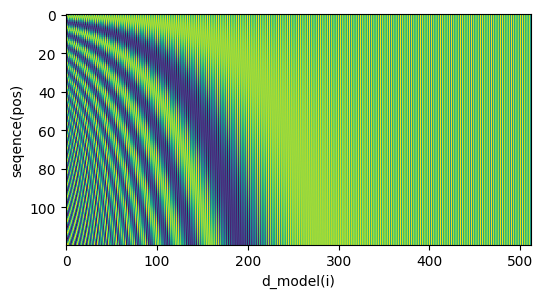

In [ ]:
seq_length = 120
d_model = 512

PE = np.zeros((seq_length, d_model))
for pos in range(seq_length):
    for i in range(d_model//2):
        PE[pos, 2*i]   = np.sin( pos / (10000**(2*i/d_model)) )
        PE[pos, 2*i+1] = np.cos( pos / (10000**(2*i/d_model)) )

plt.figure(figsize=(6,3))
plt.xlabel('d_model(i)')
plt.ylabel('seqence(pos)')
plt.imshow(PE, aspect='auto');

## Positional Encoding

In [ ]:
def positional_encoding(seq_len, depth):
    positions = np.arange(seq_len).reshape(-1, 1)
    exponent = np.arange(depth//2)[np.newaxis, :]*2/depth
    angle_rate = 1 / (10000**exponent)
    angle_rad = positions * angle_rate
    pos_encoding = np.zeros((seq_len, depth))
    pos_encoding[:, ::2] = np.sin(angle_rad)
    pos_encoding[:, 1::2] = np.cos(angle_rad)
    return torch.FloatTensor(pos_encoding).unsqueeze(0)

In [ ]:
class PositionalEmbedding(nn.Module):
    def __init__(self, seq_len, d_model, vocab_size, dropout, pad):
        super().__init__()
        self.scaler = d_model**0.5

        self.pos_encoding = positional_encoding(seq_len, d_model)
        self.embed = nn.Embedding(vocab_size, d_model, padding_idx=pad)
        self.dropout = nn.Dropout(dropout)

    def forward(self, inputs):
        out = self.embed(inputs) * self.scaler
        out = out + self.pos_encoding[:, :inputs.shape[1], :].to(inputs.device)
        out = self.dropout(out)
        return out

## 모델 구성

In [ ]:
class TransformerModel(nn.Module):
    def __init__(self, enc_vocab_size, dec_vocab_size, enc_seq_len, dec_seq_len,
                 d_model=128, d_ff=256, n_heads=2, dropout=0.1,
                 n_layers=2, enc_pad=0, dec_pad=0):
        super().__init__()
        self.device = device
        self.enc_pad = enc_pad
        self.dec_pad = dec_pad

        self.enc_embed = PositionalEmbedding(enc_seq_len, d_model, enc_vocab_size, dropout, enc_pad)
        self.dec_embed = PositionalEmbedding(dec_seq_len, d_model, dec_vocab_size, dropout, dec_pad)
        self.transformer = nn.Transformer(d_model, n_heads, n_layers, n_layers,
                                          d_ff, dropout, batch_first=True)
        self.fc = nn.Linear(d_model, dec_vocab_size)

    def forward(self, encoder_input, decoder_input):
        enc_out = self.enc_embed(encoder_input)
        dec_out = self.dec_embed(decoder_input)

        enc_padding_mask = (encoder_input == self.enc_pad).to(self.device)
        dec_padding_mask = (decoder_input == self.dec_pad).to(self.device)
        dec_mask = self.transformer.generate_square_subsequent_mask(decoder_input.size(1)).bool().to(self.device)
        out = self.transformer(enc_out, dec_out,
                               src_key_padding_mask=enc_padding_mask,
                               tgt_key_padding_mask=dec_padding_mask,
                               memory_key_padding_mask=enc_padding_mask, tgt_mask=dec_mask)
        out = self.fc(out)
        return out

## 모델 생성

In [ ]:
d_model=128
kor_pad = kor_tokenizer('<pad>')['input_ids'][0]
eng_pad = eng_tokenizer('<pad>')['input_ids'][0]

model = TransformerModel(len(kor_tokenizer), len(eng_tokenizer),  max_x_enc,  max_x_dec,
                    d_model=d_model, d_ff=128, n_heads=4, dropout=0.1, n_layers=2,
                    enc_pad=kor_pad, dec_pad=eng_pad).to(device)
summary(model)

Layer (type:depth-idx)                                                 Param #
TransformerModel                                                       --
├─PositionalEmbedding: 1-1                                             --
│    └─Embedding: 2-1                                                  1,034,112
│    └─Dropout: 2-2                                                    --
├─PositionalEmbedding: 1-2                                             --
│    └─Embedding: 2-3                                                  455,552
│    └─Dropout: 2-4                                                    --
├─Transformer: 1-3                                                     --
│    └─TransformerEncoder: 2-5                                         --
│    │    └─ModuleList: 3-1                                            199,168
│    │    └─LayerNorm: 3-2                                             256
│    └─TransformerDecoder: 2-6                                         --
│    │    └─Mod

 - LR 스케줄링

In [ ]:
# Warm up Scheduler
class WarmupLRScheduler(optim.lr_scheduler.LambdaLR):
    def __init__(self, optimizer, d_model,  warmup_steps, last_epoch=-1):
        def lambda_lr(step):
            arg1 = step**-0.5 if step > 0 else 0
            arg2 = step * (warmup_steps ** -1.5)
            return (d_model**-0.5) * min(arg1, arg2)
        super().__init__(optimizer, lambda_lr, last_epoch=last_epoch)

In [ ]:
from torch import optim
warmup_steps=4000

loss_fn = nn.CrossEntropyLoss(ignore_index=eng_pad).to(device)
optimizer = optim.Adam(model.parameters(), lr=1, eps=1e-9, betas=(0.9, 0.98))
scheduler = WarmupLRScheduler(optimizer, d_model, warmup_steps)

In [ ]:
def fit(model, loader, loss_fn, opt, scheduler):
    loss=0
    n_sample = len(loader.dataset)
    model.train()
    for enc_x, dec_x, dec_y in loader:
        enc_x, dec_x, dec_y = enc_x.to(device), dec_x.to(device), dec_y.to(device)
        h = model(enc_x, dec_x)
        cost = loss_fn(h.view(-1, h.shape[2]).to(device), dec_y.view(-1))
        opt.zero_grad()
        cost.backward()
        opt.step()
        scheduler.step()
        loss += cost * enc_x.shape[0] / n_sample
    return loss

In [ ]:
# 약 2분
n_epochs = 20
history={'loss':[]}

# 약 2분 20초
for epoch in range(n_epochs):
    train_loss = fit(model, train_loader, loss_fn, optimizer, scheduler)
    history['loss'].append(train_loss)
    print(f'epoch={epoch}, loss:{train_loss}')

epoch=0, loss:7.810583591461182
epoch=1, loss:5.45577335357666
epoch=2, loss:4.1804518699646
epoch=3, loss:3.3700549602508545
epoch=4, loss:2.979128122329712
epoch=5, loss:2.7971911430358887
epoch=6, loss:2.6512551307678223
epoch=7, loss:2.513136148452759
epoch=8, loss:2.413229465484619


## 예측 값 생성 (추론)

In [ ]:
def predict(inputs, target_len=10):
    outputs = []
    start_token = eng_tokenizer('<bos>')['input_ids'][0]
    model.eval()
    with torch.no_grad():
        enc_out = model.enc_embed(inputs.to(device))
        enc_padding_mask = (inputs == model.enc_pad).to(inputs.device)
        memory = model.transformer.encoder(enc_out, src_key_padding_mask=enc_padding_mask)
        input_words = [start_token]*inputs.shape[0]
        decoder_input = torch.LongTensor(input_words).to(inputs.device).reshape(-1,1)
        c_token = ''
        for t in range(target_len-1):
            dec_mask = model.transformer.generate_square_subsequent_mask(decoder_input.size(1)).bool().to(inputs.device)
            decoder_input_emb = model.dec_embed(decoder_input)
            out = model.transformer.decoder(decoder_input_emb, memory, dec_mask)
            proba = model.fc(out[:, -1])
            decoder_output = proba.argmax(dim=1).reshape(-1, 1)
            outputs.append(decoder_output.item())
            decoder_input = torch.cat([decoder_input,  decoder_output], dim=1).long()
            c_token = eng_tokenizer.decode(outputs[-1])

            if c_token == '<eos>':
                break
    outputs = eng_tokenizer.decode(outputs[:-1])
    return outputs

In [ ]:
import re

def preprocessing(text, maxlen, tokenizer):
    text = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣!? ]', '', text)
    text = torch.LongTensor(tokenizer(text)['input_ids'])
    text = custom_padding([text], maxlen=maxlen, padding='pre')
    return text

In [ ]:
np.random.seed(1)

for i in range(5):
    idx = np.random.randint(0, len(korean))
    inputs = korean[idx]
    data = preprocessing(inputs, max_x_enc, kor_tokenizer).reshape(1, -1)
    pred = predict(data.to(device))
    print(inputs, pred, sep=' -> ')

톰은 은퇴했어  -> tom is a timid
그들이 떠났어  -> tom is a child
공부하고 계십니까? -> tom is a timid
톰은 택시를 잡았다  -> tom is a timid
물이 별로 없다  -> tom is a timid


## 학습 Epoch 추가

## 데이터 로더 생성

In [ ]:
torch.manual_seed(777)
train_loader = DataLoader(dataset=train_set,
                          batch_size=128,
                          shuffle=True,
                          drop_last=False)

In [ ]:
d_model=128
spa_pad = kor_tokenizer('<pad>')['input_ids'][0]
eng_pad = eng_tokenizer('<pad>')['input_ids'][0]

model = TransformerModel(len(kor_tokenizer), len(eng_tokenizer),  max_x_enc,  max_x_dec,
                    d_model=d_model, d_ff=256, n_heads=4, dropout=0.1, n_layers=2,
                    enc_pad=spa_pad, dec_pad=eng_pad).to(device)

In [ ]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                                 Param #
TransformerModel                                                       --
├─PositionalEmbedding: 1-1                                             --
│    └─Embedding: 2-1                                                  1,034,112
│    └─Dropout: 2-2                                                    --
├─PositionalEmbedding: 1-2                                             --
│    └─Embedding: 2-3                                                  455,552
│    └─Dropout: 2-4                                                    --
├─Transformer: 1-3                                                     --
│    └─TransformerEncoder: 2-5                                         --
│    │    └─ModuleList: 3-1                                            264,960
│    │    └─LayerNorm: 3-2                                             256
│    └─TransformerDecoder: 2-6                                         --
│    │    └─Mod

In [ ]:
class WarmupLRScheduler(optim.lr_scheduler.LambdaLR):
    def __init__(self, optimizer, d_model,  warmup_steps, last_epoch=-1):
        def lambda_lr(step):
            arg1 = step**-0.5 if step > 0 else 0
            arg2 = step * (warmup_steps ** -1.5)
            return (d_model**-0.5) * min(arg1, arg2)
        super().__init__(optimizer, lambda_lr, last_epoch=last_epoch)

In [ ]:
warmup_steps=4000

loss_fn = nn.CrossEntropyLoss(ignore_index=eng_pad).to(device)
optimizer = optim.Adam(model.parameters(), lr=1, eps=1e-9, betas=(0.9, 0.98))
scheduler = WarmupLRScheduler(optimizer, d_model, warmup_steps)

In [ ]:
def fit(model, loader, loss_fn, opt, scheduler):
    loss=0
    n_sample = len(loader.dataset)
    model.train()
    for enc_x, dec_x, dec_y in loader:
        enc_x, dec_x, dec_y = enc_x.to(device), dec_x.to(device), dec_y.to(device)
        h = model(enc_x, dec_x)
        cost = loss_fn(h.view(-1, h.shape[2]).to(device), dec_y.view(-1))
        opt.zero_grad()
        cost.backward()
        opt.step()
        scheduler.step()
        loss += cost * enc_x.shape[0] / n_sample
    return loss

In [ ]:
n_epochs = 50
history={'loss':[]}

for epoch in range(n_epochs):
    train_loss = fit(model, train_loader, loss_fn, optimizer, scheduler)
    history['loss'].append(train_loss)
    print(f'epoch={epoch}, loss:{train_loss}')

epoch=0, loss:8.211788177490234
epoch=1, loss:8.086181640625
epoch=2, loss:7.836764335632324
epoch=3, loss:7.498661994934082
epoch=4, loss:7.148290157318115
epoch=5, loss:6.865504741668701
epoch=6, loss:6.641902923583984
epoch=7, loss:6.446969985961914
epoch=8, loss:6.256275177001953
epoch=9, loss:6.060021877288818
epoch=10, loss:5.869675636291504
epoch=11, loss:5.691456317901611
epoch=12, loss:5.521417140960693
epoch=13, loss:5.36467170715332
epoch=14, loss:5.2181220054626465
epoch=15, loss:5.081201076507568
epoch=16, loss:4.967633247375488
epoch=17, loss:4.860131740570068
epoch=18, loss:4.7673492431640625
epoch=19, loss:4.679873466491699
epoch=20, loss:4.596785068511963
epoch=21, loss:4.523033618927002
epoch=22, loss:4.442015647888184
epoch=23, loss:4.363549709320068
epoch=24, loss:4.290116310119629
epoch=25, loss:4.215661525726318
epoch=26, loss:4.148125171661377
epoch=27, loss:4.072376251220703
epoch=28, loss:4.008485317230225
epoch=29, loss:3.935479164123535
epoch=30, loss:3.87447

In [ ]:
np.random.seed(1)
for i in range(5):
    idx = np.random.randint(0, len(korean))
    inputs = korean[idx]
    data = preprocessing(inputs, max_x_enc, kor_tokenizer).reshape(1, -1)
    pred = predict(data.to(device))
    print(inputs, pred, sep=' -> ')

톰은 은퇴했어  -> tom is a great
그들이 떠났어  -> tom is a great
공부하고 계십니까? -> tom is a tom is a great
톰은 택시를 잡았다  -> tom is a timid
물이 별로 없다  -> tom is a timid


 - 학습 추가 (+ 50 epochs, 총 100 epochs)

In [ ]:
n_epochs = 50
history={'loss':[]}

for epoch in range(n_epochs):
    train_loss = fit(model, train_loader, loss_fn, optimizer, scheduler)
    history['loss'].append(train_loss)
    print(f'epoch={epoch}, loss:{train_loss}')

epoch=0, loss:2.583604335784912
epoch=1, loss:2.5211684703826904
epoch=2, loss:2.4585299491882324
epoch=3, loss:2.3955090045928955
epoch=4, loss:2.3321120738983154
epoch=5, loss:2.2699697017669678
epoch=6, loss:2.1993045806884766
epoch=7, loss:2.1395514011383057
epoch=8, loss:2.074187755584717
epoch=9, loss:2.011920213699341
epoch=10, loss:1.9569181203842163
epoch=11, loss:1.8896714448928833
epoch=12, loss:1.8307298421859741
epoch=13, loss:1.7741210460662842
epoch=14, loss:1.709184169769287
epoch=15, loss:1.6495413780212402
epoch=16, loss:1.5853984355926514
epoch=17, loss:1.530895709991455
epoch=18, loss:1.4815386533737183
epoch=19, loss:1.416407585144043
epoch=20, loss:1.3575464487075806
epoch=21, loss:1.3083916902542114
epoch=22, loss:1.2508496046066284
epoch=23, loss:1.1882094144821167
epoch=24, loss:1.1460909843444824
epoch=25, loss:1.1015865802764893
epoch=26, loss:1.0495301485061646
epoch=27, loss:0.9948638081550598
epoch=28, loss:0.9588837623596191
epoch=29, loss:0.9124066233634

In [ ]:
np.random.seed(1)

for i in range(5):
    idx = np.random.randint(0, len(korean))
    inputs = korean[idx]
    data = preprocessing(inputs, max_x_enc, kor_tokenizer).reshape(1, -1)
    pred = predict(data.to(device))
    print(inputs, pred, sep=' -> ')

톰은 은퇴했어  -> tom got retired
그들이 떠났어  -> tom left
공부하고 계십니까? -> tom is quick
톰은 택시를 잡았다  -> tom has asperger s
물이 별로 없다  -> tom is starving


 - 학습 추가 (+ 50 epochs, 총 150 epochs)

In [ ]:
n_epochs = 50
history={'loss':[]}

for epoch in range(n_epochs):
    train_loss = fit(model, train_loader, loss_fn, optimizer, scheduler)
    history['loss'].append(train_loss)
    print(f'epoch={epoch}, loss:{train_loss}')

epoch=0, loss:0.3390522003173828
epoch=1, loss:0.32577788829803467
epoch=2, loss:0.3272443115711212
epoch=3, loss:0.3030391037464142
epoch=4, loss:0.30695459246635437
epoch=5, loss:0.2917649447917938
epoch=6, loss:0.283556193113327
epoch=7, loss:0.28171736001968384
epoch=8, loss:0.2713054120540619
epoch=9, loss:0.25207480788230896
epoch=10, loss:0.2553345561027527
epoch=11, loss:0.2532224655151367
epoch=12, loss:0.24387454986572266
epoch=13, loss:0.24505029618740082
epoch=14, loss:0.23347048461437225
epoch=15, loss:0.21882490813732147
epoch=16, loss:0.2198243886232376
epoch=17, loss:0.2160395383834839
epoch=18, loss:0.2106255292892456
epoch=19, loss:0.2000730037689209
epoch=20, loss:0.21056444942951202
epoch=21, loss:0.20603320002555847
epoch=22, loss:0.19557690620422363
epoch=23, loss:0.19304010272026062
epoch=24, loss:0.18983526527881622
epoch=25, loss:0.18865850567817688
epoch=26, loss:0.18783727288246155
epoch=27, loss:0.18154938519001007
epoch=28, loss:0.1853315681219101
epoch=29,

In [ ]:
np.random.seed(1)

for i in range(5):
    idx = np.random.randint(0, len(korean))
    inputs = korean[idx]
    data = preprocessing(inputs, max_x_enc, kor_tokenizer).reshape(1, -1)
    pred = predict(data.to(device))
    print(inputs, pred, sep=' -> ')

톰은 은퇴했어  -> tom got retired
그들이 떠났어  -> tom left
공부하고 계십니까? -> tom is a muslim
톰은 택시를 잡았다  -> tom took a cab
물이 별로 없다  -> tom is a muslim


# 허깅페이스 Transformers

In [ ]:
from transformers import pipeline
classifier = pipeline('text-classification')
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name)

text = "I've been waiting for a HuggingFace course my whole life."
inputs = tokenizer(text, return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
label = model.config.id2label[predicted_class_id]
score = torch.softmax(logits, dim=1).squeeze()[predicted_class_id].item()
print(f'label:{label}, score:{score}')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

label:POSITIVE, score:0.9598048329353333


In [ ]:
# 파이플라인 모델 지정
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)
classifier("I've been waiting for a HuggingFace course my whole life.")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

In [ ]:
# 여러 문장 분류
classifier(
    ["I've been waiting for a HuggingFace course my whole life.",
     "I hate this so much!"])

[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

In [ ]:
# 한국어 감정 분류
classifier_ko = pipeline('text-classification', model='matthewburke/korean_sentiment')
classifier_ko(
    ["그녀가 먼저 말을 걸어와서 나는 무척 기뻤다.",
     "듣기 싫어 죽겠네, 짜증나니까 그만 좀 닥쳐줄래"])

config.json:   0%|          | 0.00/887 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/396k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/788k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'LABEL_1', 'score': 0.9496679902076721},
 {'label': 'LABEL_0', 'score': 0.9464049339294434}]

In [ ]:
# zero-shot classification
classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445968627929688, 0.1119757816195488, 0.04342734441161156]}

In [ ]:
# 한국어 zero-shot classificaiton
model_name = 'MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7'
classifier_ko = pipeline("zero-shot-classification", model_name )
classifier_ko(
    "이 강의는 트랜스포머 라이브러리에 대한 것입니다.",
    candidate_labels=["교육", "정치", "사업"],
)

config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/467 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'sequence': '이 강의는 트랜스포머 라이브러리에 대한 것입니다.',
 'labels': ['교육', '정치', '사업'],
 'scores': [0.7452666759490967, 0.2351018637418747, 0.019631439819931984]}

In [ ]:
classifier_ko(
    "이 소총의 유효사거리는 5km를 넘습니다.",
    candidate_labels=["예술", "정치", "군사"],
)

{'sequence': '이 소총의 유효사거리는 5km를 넘습니다.',
 'labels': ['군사', '정치', '예술'],
 'scores': [0.7075021266937256, 0.1599733829498291, 0.1325245350599289]}

In [ ]:
classifier_ko(
    "선과 색의 조화가 탁월한 그 작품은 과거의 어느 작가의 그것과 닮아 있다.",
    candidate_labels=["예술", "정치", "군사"],
)

{'sequence': '선과 색의 조화가 탁월한 그 작품은 과거의 어느 작가의 그것과 닮아 있다.',
 'labels': ['예술', '군사', '정치'],
 'scores': [0.8367235064506531, 0.08361261337995529, 0.07966390252113342]}

In [ ]:
# Q & A
question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.6949753165245056, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

In [ ]:
# 한국어 Q & A
question_answerer = pipeline("question-answering", model='timpal0l/mdeberta-v3-base-squad2')
question_answerer(
    question="홍길동은 어디에 있지?",
    context="홍길동씨는 잠실에 있는 숨겨진 국가정보원 빌딩에서 청소를 하며 살아 가고있다.",
)

config.json:   0%|          | 0.00/879 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.7171633243560791, 'start': 5, 'end': 9, 'answer': ' 잠실에'}

In [ ]:
question_answerer(
    question="홍길동은 무얼하고 있지?",
    context="홍길동씨는 잠실에 있는 숨겨진 국가정보원 빌딩에서 청소를 하며 살아 가고있다.",
)

{'score': 0.588015079498291, 'start': 27, 'end': 31, 'answer': ' 청소를'}

In [ ]:
# GPT 텍스트 생성
from transformers import pipeline

generator = pipeline("text-generation", model='gpt2')
generator("In this course, we will teach you how to")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to run, build, and manipulate data using Excel and JavaScript. We will demonstrate you how to connect functions and functions to data using SQL, Java, and PHP.\n\nAbout the Course\n\nThe'}]

In [ ]:
# KoGPT 텍스트 생성
generator = pipeline("text-generation", model='skt/kogpt2-base-v2')
output = generator("감기에 걸리지 않으려면")
print(output[0]['generated_text'])

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


감기에 걸리지 않으려면 물을 항상 마셔야 한다.
하지만 물놀이는 하지 못할 만큼 힘든 운동이다.
물놀이는 물에 들어가는 시간을 줄인다는 점에서 중요하다.
물에 들어가면 몸에 이물질이 붙어 몸 곳곳에 이물질이 남아서 몸을 적신다.
물이나 함께 있으면 이물질이


In [ ]:
# Bert 텍스트 분류
from transformers import pipeline

texts = ['아름다운 이에요.', '아 짜증나 듣기 싫어 죽겠네.']
model_name = 'Woonn/klue_bert_base'

classifier = pipeline('text-classification', model=model_name )
classifier(texts)

config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/523 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/752k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'LABEL_1', 'score': 0.9505610466003418},
 {'label': 'LABEL_0', 'score': 0.9900859594345093}]